In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_excel("C:/Users/bhati/Downloads/AQI Dataset.xlsx")

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
0,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
1,Bangalore,01/01/18,68,37.4,73.44,56.44,77.52,0.71,64.6
2,Bangalore,02/01/18,76,41.8,82.08,63.08,86.64,0.8,72.2
3,Bangalore,03/01/18,70,38.5,75.6,58.1,79.8,0.74,66.5
4,Bangalore,04/01/18,78,42.9,84.24,64.74,88.92,0.82,74.1


In [4]:
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
df.head()

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,Bangalore,01/01/18,68,37.4,73.44,56.44,77.52,0.71,64.6
1,Bangalore,02/01/18,76,41.8,82.08,63.08,86.64,0.8,72.2
2,Bangalore,03/01/18,70,38.5,75.6,58.1,79.8,0.74,66.5
3,Bangalore,04/01/18,78,42.9,84.24,64.74,88.92,0.82,74.1
4,Bangalore,05/01/18,82,45.1,88.56,68.06,93.48,0.86,77.9


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.isnull().sum()

0
City     0
Date     0
AQI      1
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

In [7]:
df=df.dropna(subset=["AQI"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12045 entries, 0 to 12045
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    12045 non-null  object
 1   Date    12045 non-null  object
 2   AQI     12045 non-null  object
 3   PM2.5   12045 non-null  object
 4   PM10    12045 non-null  object
 5   NO2     12045 non-null  object
 6   SO2     12045 non-null  object
 7   CO      12045 non-null  object
 8   O3      12045 non-null  object
dtypes: object(9)
memory usage: 941.0+ KB


In [9]:
cols_to_convert = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3","AQI"]

In [10]:
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [11]:
print(df.dtypes)

0
City      object
Date      object
AQI      float64
PM2.5    float64
PM10     float64
NO2      float64
SO2      float64
CO       float64
O3       float64
dtype: object


In [27]:
df["Date"] = pd.to_datetime(df["Date"],format="%d%m%y",dayfirst=True, errors="coerce")

In [28]:
df["Month"] = df["Date"].dt.month_name()  # Like "January"
df["Year"] = df["Date"].dt.strftime("%Y") # Like "2025"

In [29]:
df.tail()

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Month,Year
12041,Mumbai,2024-12-27,154.0,84.70,166.32,127.82,175.56,1.62,146.30,December,2024
12042,Mumbai,2024-12-28,188.0,103.40,203.04,156.04,214.32,1.97,178.60,December,2024
12043,Mumbai,2024-12-29,186.0,102.30,200.88,154.38,212.04,1.95,176.70,December,2024
12044,Mumbai,2024-12-30,121.0,66.55,130.68,100.43,137.94,1.27,114.95,December,2024
12045,Mumbai,2024-12-31,124.0,68.20,133.92,102.92,141.36,1.30,117.80,December,2024


In [53]:
df.isnull().sum()

0
City     0
Date     0
AQI      0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
Month    0
Year     0
dtype: int64

In [16]:
df = df.dropna(subset=["Date","AQI","PM2.5","PM10","NO2","SO2","CO","O3","Month","Year"])

In [17]:
df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]].describe()

,PM2.5,PM10,NO2,SO2,O3,CO
count,12041.000000,12041.000000,12041.000000,12041.000000,12041.000000,12041.000000
mean,59.172801,116.193864,89.297136,122.649079,102.207566,1.129989
std,41.265793,81.031012,62.273833,85.532735,71.277279,0.787811
min,10.450000,20.520000,15.770000,21.660000,18.050000,0.200000
25%,33.000000,64.800000,49.800000,68.400000,57.000000,0.630000
50%,45.650000,89.640000,68.890000,94.620000,78.850000,0.870000
75%,68.200000,133.920000,102.920000,141.360000,117.800000,1.300000
max,271.700000,533.520000,410.020000,563.160000,469.300000,5.190000


In [18]:
#1. Average AQI per city and month
avg_aqi = df.groupby(["City", "Month"])["AQI"].mean().unstack(0)

In [19]:
print(avg_aqi)

City       Bangalore    Chennai       Delhi   Hyderabad      Mumbai
Month                                                              
April      85.071429  58.785714  184.761111   88.457143   95.513966
August     55.225806  66.861751   92.806452   53.290323   52.634409
December   86.110599  87.967442  334.591398  114.110599  171.413978
February   91.060914  87.385787  248.633136  106.796954  156.154762
January    91.861751  98.995392  322.080645  116.096774  173.672043
July       52.138249  72.304147  101.946237   47.188940   55.048387
June       54.814286  76.827751  162.100000   60.119048   59.927778
March      95.797235  77.004608  182.591398  101.258065  130.140541
May        69.368664  71.253456  187.032258   84.953917   82.704301
November   80.628571  86.661905  349.811111  109.461905  150.688889
October    74.193548  77.244240  232.387097   87.847926  100.844086
September  56.476190  66.975845  103.305556   56.328571   55.372222


In [20]:
#2. Most polluting city (by average AQI)
most_polluting = df.groupby("City")["AQI"].mean().sort_values(ascending=False)
print(most_polluting)

City
Delhi        208.285714
Mumbai       106.782450
Hyderabad     85.401408
Chennai       77.336471
Bangalore     74.321596
Name: AQI, dtype: float64


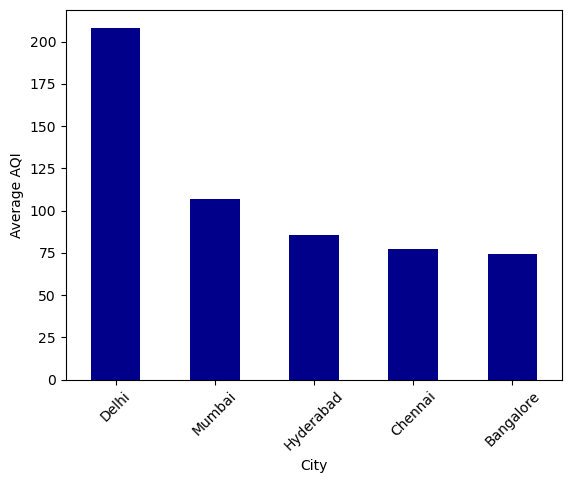

In [33]:
most_polluting.plot(kind='bar',color='darkblue')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [43]:
#3. Best air quality month (lowest avg AQI)
best_month = df.groupby("Month")["AQI"].mean()
print(best_month)

Month
January      155.248289
February     134.101293
March        114.979452
April        100.242669
May           96.892473
June          81.049545
July          64.951124
August        63.645161
September     66.985816
October      111.345064
November     149.705051
December     153.259549
Name: AQI, dtype: float64


In [44]:
# Define correct month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Convert "Month" column to a categorical type with correct order
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

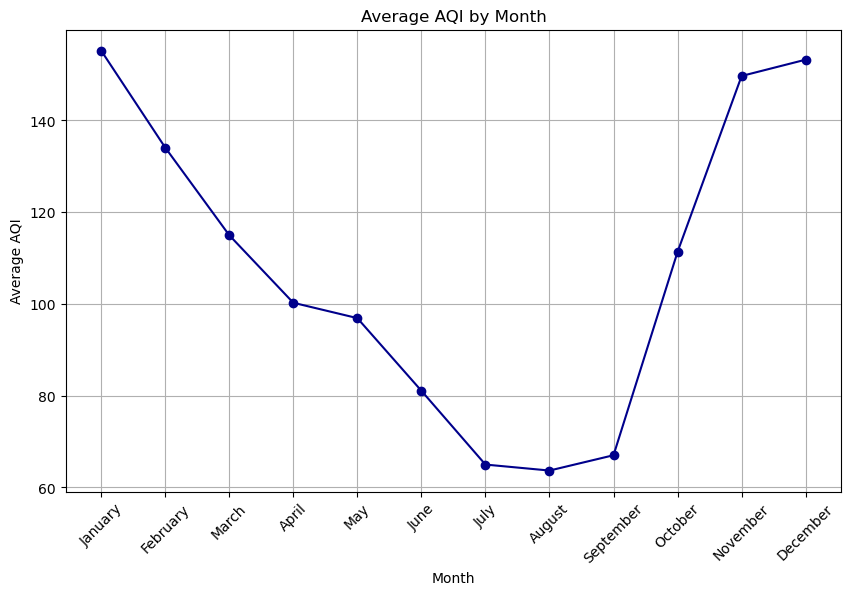

In [48]:
best_month.plot(kind='line', figsize=(10, 6),color='darkblue',marker='o')
plt.title('Average AQI by Month')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(ticks=range(12), labels=month_order, rotation=45)
plt.grid(True)
plt.show()

In [24]:
#4. Pollutant-wise trends over time
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]
pollutant_trends = df.groupby("Month")[pollutants].mean()
print(pollutant_trends)

0              PM2.5        PM10         NO2         SO2          O3        CO
Month                                                                         
April      55.133468  108.262083   83.201416  114.276643   95.230536  1.052912
August     35.004839   68.736774   52.825484   72.555484   60.462903  0.668514
December   84.292752  165.520313  127.205426  174.715886  145.596572  1.609589
February   73.755711  144.829397  111.304073  152.875474  127.396228  1.408427
January    85.386559  167.668152  128.856080  176.983050  147.485875  1.630420
July       35.723118   70.147214   53.909433   74.044282   61.703568  0.682463
June       44.577250   87.533509   67.271122   92.396481   76.997068  0.851395
March      63.238699  124.177808   95.432945  131.076575  109.230479  1.207554
May        53.290860  104.643871   80.420753  110.457419   92.047849  1.017674
November   82.337778  161.681455  124.255192  170.663758  142.219798  1.572343
October    61.239785  120.252669   92.416403  126.93

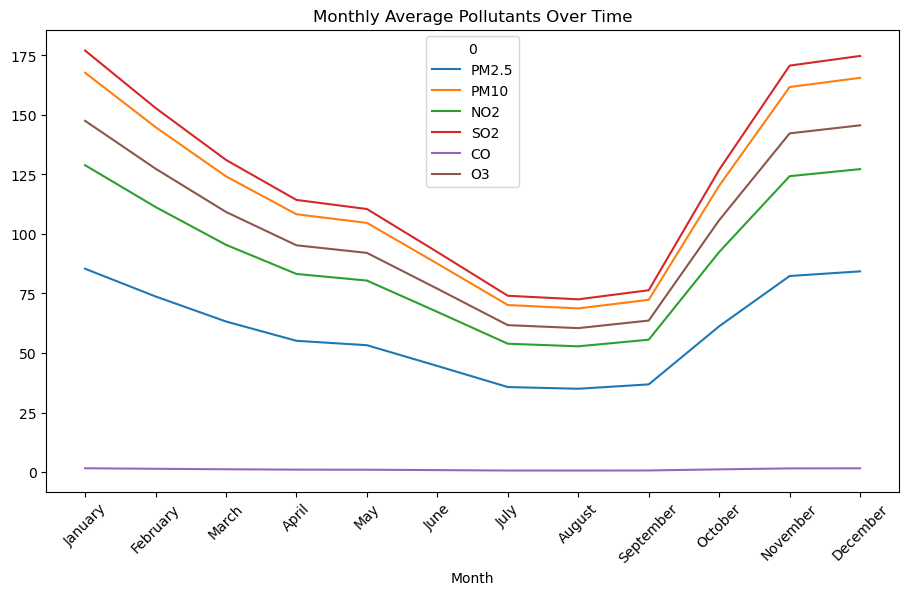

In [26]:
monthly_avg = df.groupby("Month")[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].mean()

monthly_avg.plot(figsize=(11,6))
plt.title("Monthly Average Pollutants Over Time")
plt.xticks(ticks=range(12), labels=month_order, rotation=45)
plt.show()

In [49]:
#5.Number of unhealhty days per city
unhealthy_days = df[df["AQI"] > 150].groupby("City").size().sort_values(ascending=False)
print(unhealthy_days)

City
Delhi        1389
Mumbai        531
Hyderabad     103
Chennai        84
Bangalore      26
dtype: int64


In [57]:
#6. AQI Trend per City (Improving or Worsening?)
city_year_trend = df.groupby(["City", "Year"])["AQI"].mean().unstack()
print(city_year_trend)

Year             2018        2019        2020        2021        2022  \
City                                                                    
Bangalore   79.739726   81.893151   64.473973   69.575342   78.071233   
Chennai     99.179558   86.178571   68.515068   66.200000   71.586301   
Delhi      228.326027  214.679452  185.284932  208.575342         NaN   
Hyderabad   95.378082   90.610959   75.076712   87.928767   87.797260   
Mumbai            NaN  102.378453   94.506849  112.180822  120.728767   

Year             2023        2024  
City                               
Bangalore   72.578082   73.920765  
Chennai     78.068871   71.849727  
Delhi      203.715068  209.131148  
Hyderabad   84.252055   76.789617  
Mumbai     119.663014   91.243169  


<Axes: xlabel='Year'>

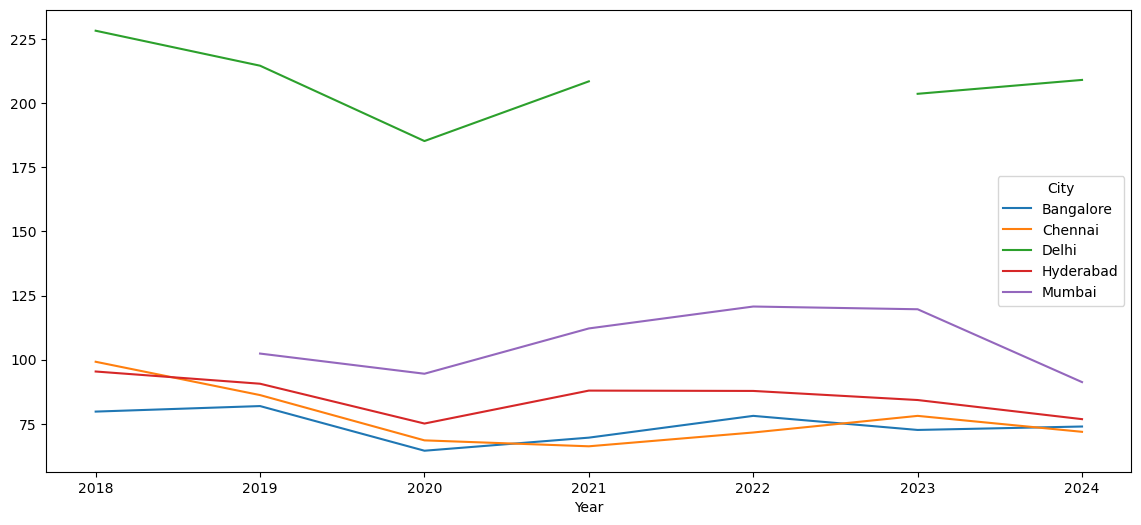

In [58]:
city_year_trend.T.plot(figsize=(14,6))

In [59]:
#7. Calculate correlation between AQI and pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
correlation = df[pollutants + ['AQI']].corr()

# Show correlation of each pollutant with AQI
aqi_corr = correlation['AQI'].drop('AQI').sort_values(ascending=False)
print("Correlation of Pollutants with AQI:\n", aqi_corr)


Correlation of Pollutants with AQI:
 0
O3       1.000000
PM2.5    1.000000
NO2      1.000000
SO2      1.000000
PM10     1.000000
CO       0.999993
Name: AQI, dtype: float64


In [62]:
#8. Pollutant Spikes (Detect SO₂ or CO spikes)
from scipy.stats import zscore

# Add Z-scores
df['z_SO2'] = zscore(df['SO2'])
df['z_CO'] = zscore(df['CO'])

# Mark spikes: anything with Z-score > 2
df['SO2_Spike'] = df['z_SO2'] > 2
df['CO_Spike'] = df['z_CO'] > 2

# Count number of spikes
print("SO2 Spikes:", df['SO2_Spike'].sum())
print("CO Spikes:", df['CO_Spike'].sum())

SO2 Spikes: 711
CO Spikes: 711


In [63]:
spike_days = df[df['SO2_Spike'] | df['CO_Spike']][['City', 'Date', 'SO2', 'CO']]
spike_days.head()

,City,Date,SO2,CO
3218,Chennai,2019-10-27,296.40,2.73
3226,Chennai,2019-11-04,298.68,2.75
3229,Chennai,2019-11-07,310.08,2.86
3230,Chennai,2019-11-08,328.32,3.02
5109,Delhi,2018-01-01,462.84,4.26
